In [244]:
from modules.data_gathering import get_working_dataset
import pandas as pd

In [245]:
#https://simplemaps.com/data/us-cities

### Import Data

In [296]:
df = pd.read_csv("../data/flights_with_weather.csv")

### Exploratory Data Analysis

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99426 entries, 0 to 99425
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fl_date              99426 non-null  object 
 1   mkt_unique_carrier   99426 non-null  object 
 2   branded_code_share   99426 non-null  object 
 3   mkt_carrier          99426 non-null  object 
 4   mkt_carrier_fl_num   99426 non-null  int64  
 5   op_unique_carrier    99426 non-null  object 
 6   tail_num             99137 non-null  object 
 7   op_carrier_fl_num    99426 non-null  int64  
 8   origin_airport_id    99426 non-null  int64  
 9   origin               99426 non-null  object 
 10  origin_city_name     99426 non-null  object 
 11  dest_airport_id      99426 non-null  int64  
 12  dest                 99426 non-null  object 
 13  dest_city_name       99426 non-null  object 
 14  crs_dep_time         99426 non-null  int64  
 15  crs_arr_time         99426 non-null 

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt


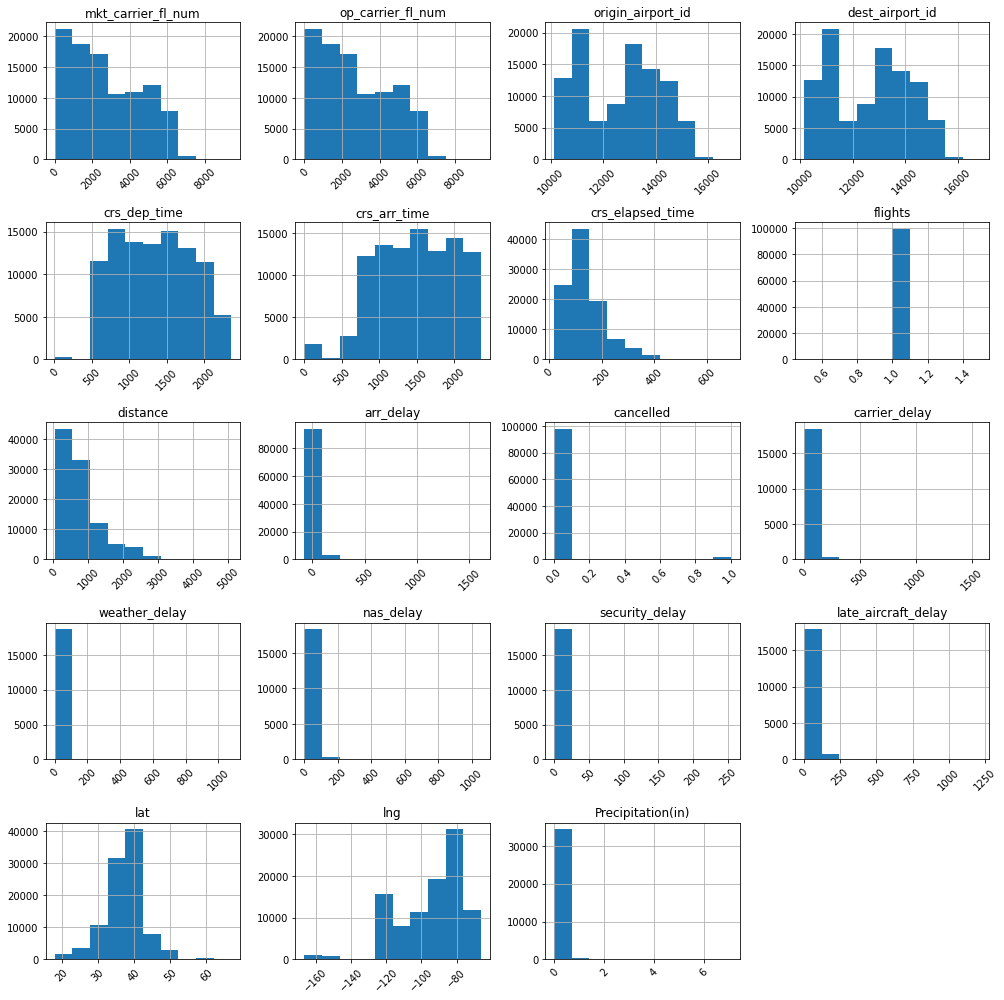

In [249]:
df.hist(figsize=(14,14), xrot=45)
plt.tight_layout()

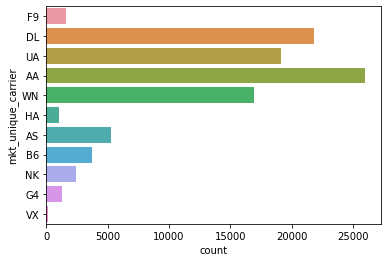

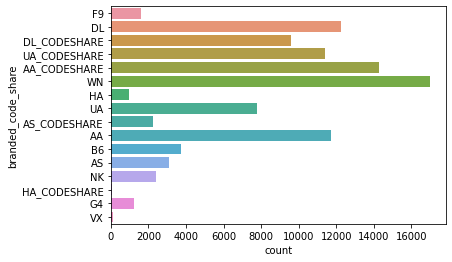

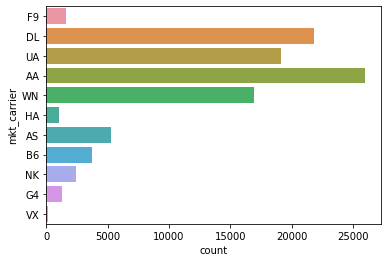

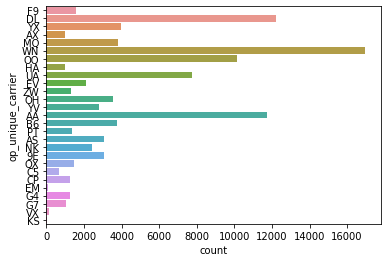

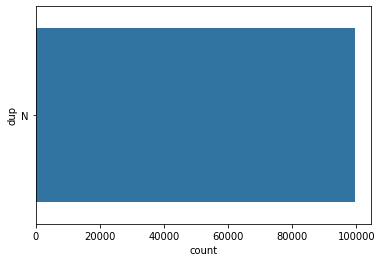

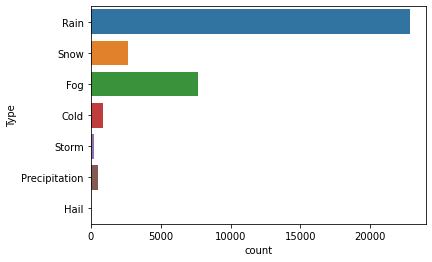

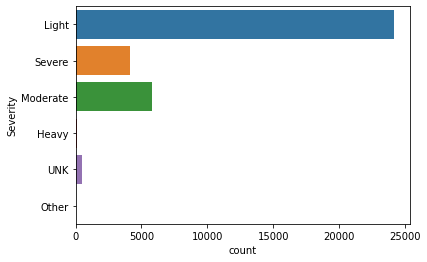

In [250]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 100:
        sns.countplot(y=column, data=df)
        plt.show()

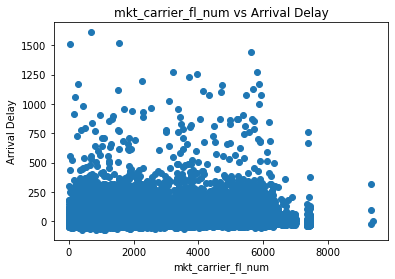

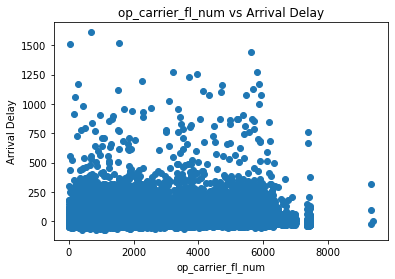

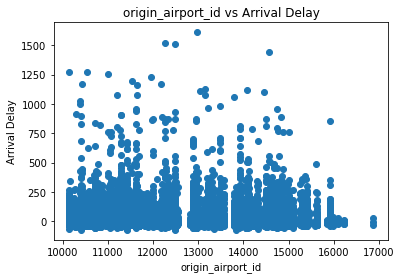

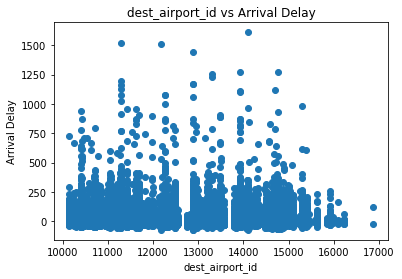

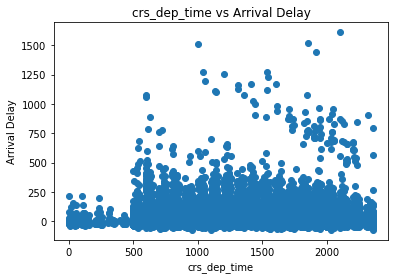

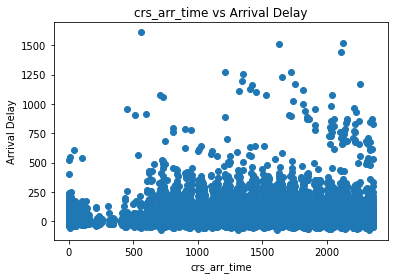

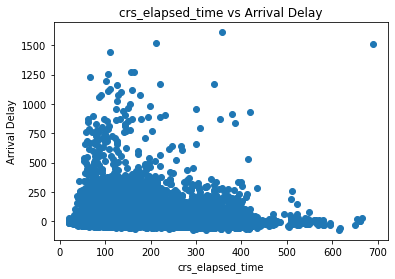

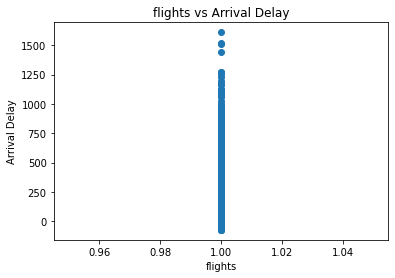

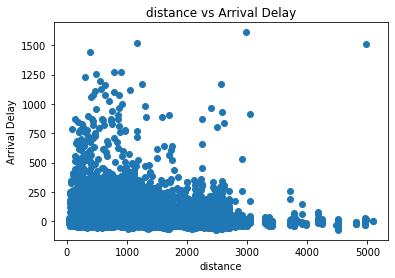

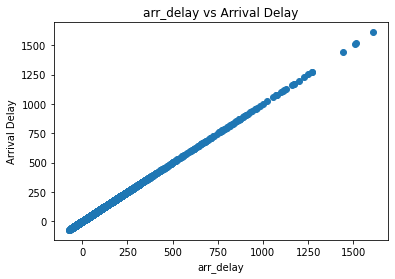

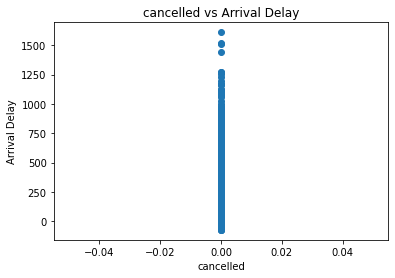

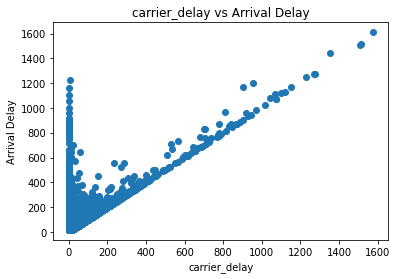

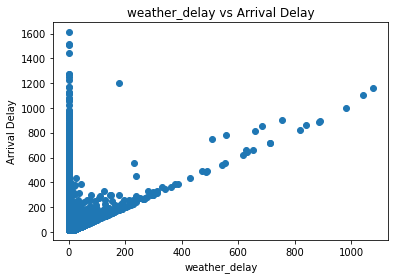

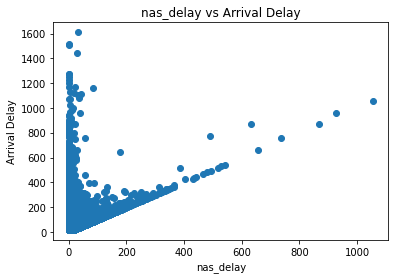

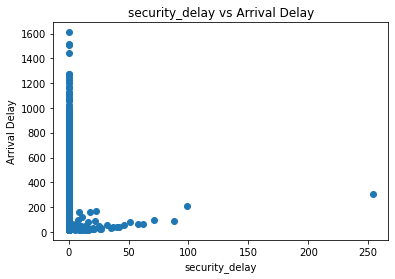

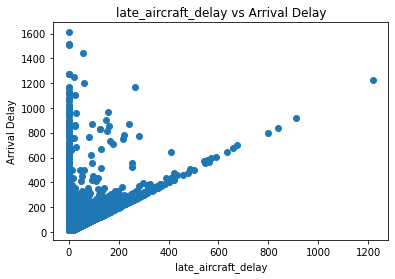

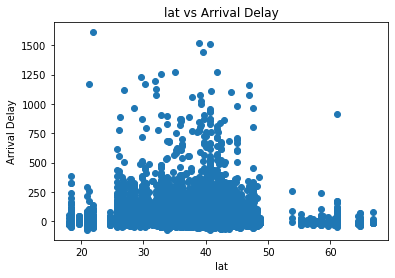

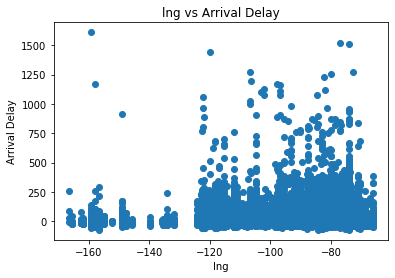

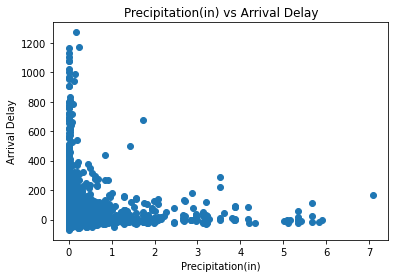

In [251]:
for x in df.select_dtypes(include=["number"]).columns:
  plt.figure()
  plt.scatter(x=df[x], y=df["arr_delay"])
  plt.xlabel(f"{x}")
  plt.ylabel("Arrival Delay")
  plt.title(f"{x} vs Arrival Delay")

<AxesSubplot:>

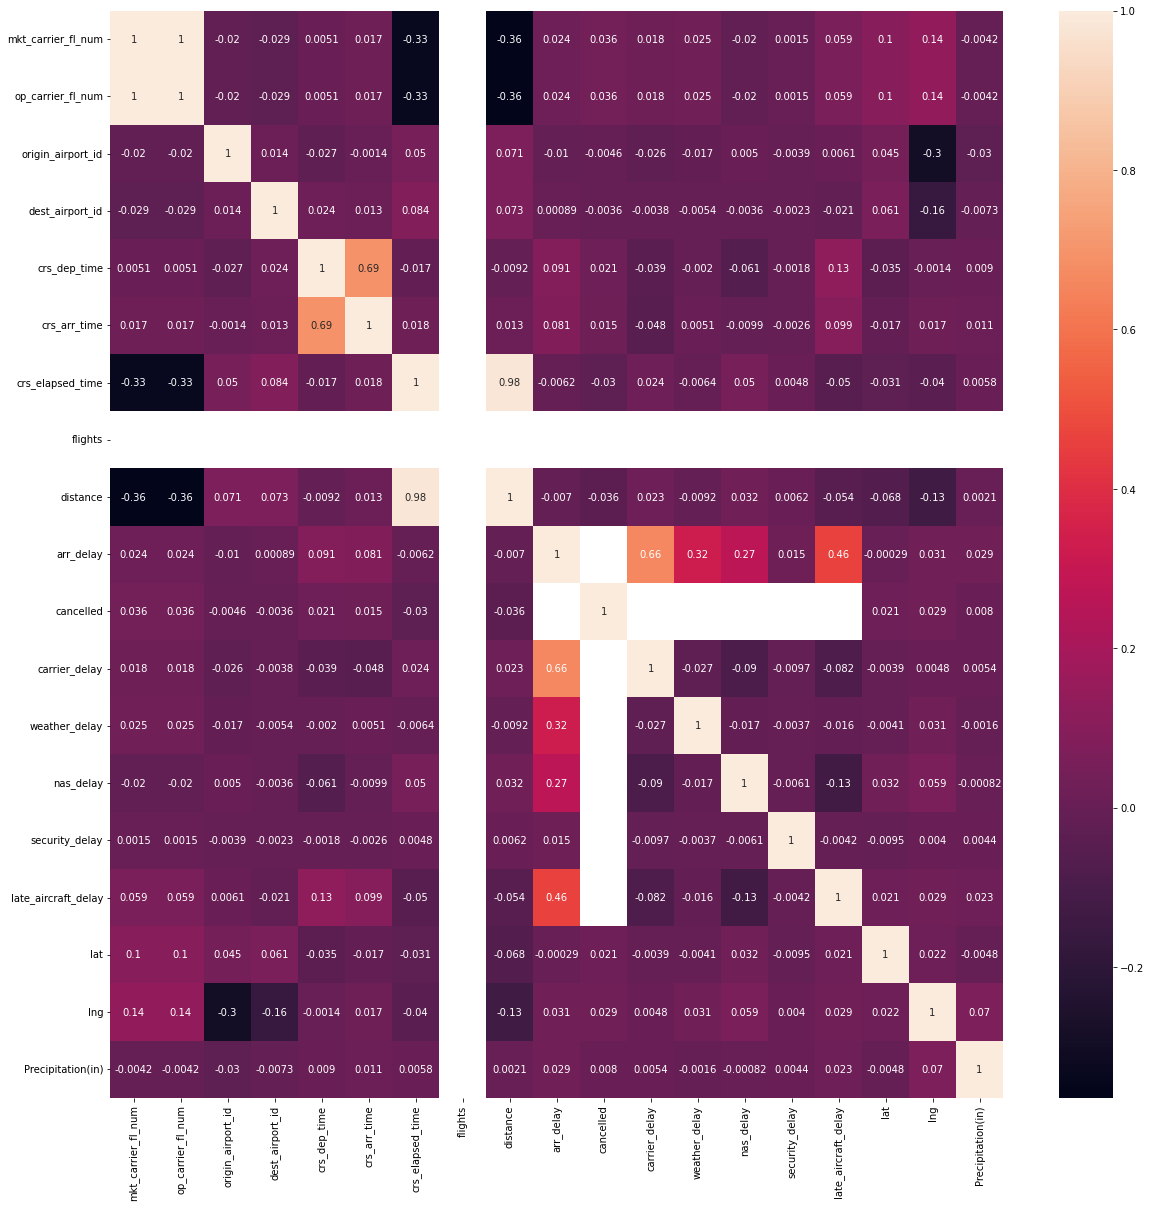

In [252]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

- Sunday has the least amount of flights in this sample
- AA was the most used marketing carrier (American Airlines ?)
- WN was the most used operating carrier
- No linear relations with features and arrival delay

### Data Cleaning

In [253]:
df.loc[df["arr_delay"].isnull(), "cancelled"].value_counts()

1.0    1652
0.0     285
Name: cancelled, dtype: int64

In [254]:
df["Type"] = df["Type"].fillna("Other")

In [255]:
df["Severity"] = df["Severity"].fillna("None")

In [256]:
df = df.dropna(subset=["tail_num"])

In [257]:
df = df.fillna(0)

In [258]:
df = df.reset_index(drop=True)

In [259]:
df.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
crs_arr_time           0
dup                    0
crs_elapsed_time       0
flights                0
distance               0
arr_delay              0
cancelled              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
lat                    0
lng                    0
Type                   0
Severity               0
Precipitation(in)      0
dtype: int64

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99137 entries, 0 to 99136
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fl_date              99137 non-null  object 
 1   mkt_unique_carrier   99137 non-null  object 
 2   branded_code_share   99137 non-null  object 
 3   mkt_carrier          99137 non-null  object 
 4   mkt_carrier_fl_num   99137 non-null  int64  
 5   op_unique_carrier    99137 non-null  object 
 6   tail_num             99137 non-null  object 
 7   op_carrier_fl_num    99137 non-null  int64  
 8   origin_airport_id    99137 non-null  int64  
 9   origin               99137 non-null  object 
 10  origin_city_name     99137 non-null  object 
 11  dest_airport_id      99137 non-null  int64  
 12  dest                 99137 non-null  object 
 13  dest_city_name       99137 non-null  object 
 14  crs_dep_time         99137 non-null  int64  
 15  crs_arr_time         99137 non-null 

In [261]:
df.to_csv("../data/cleaned_flights_with_weather.csv", index=False)

## Classification

In [271]:

cols = ["arr_delay", "cancelled", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
X = df.drop(columns=cols)
y = df["cancelled"]

### Feature Selection / Extraction / Transformation

In [272]:
from modules.transformation import standard_scale, hot_encode, log_transform, ordinal_encode
import numpy as np

In [273]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99137 entries, 0 to 99136
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             99137 non-null  object 
 1   mkt_unique_carrier  99137 non-null  object 
 2   branded_code_share  99137 non-null  object 
 3   mkt_carrier         99137 non-null  object 
 4   mkt_carrier_fl_num  99137 non-null  int64  
 5   op_unique_carrier   99137 non-null  object 
 6   tail_num            99137 non-null  object 
 7   op_carrier_fl_num   99137 non-null  int64  
 8   origin_airport_id   99137 non-null  int64  
 9   origin              99137 non-null  object 
 10  origin_city_name    99137 non-null  object 
 11  dest_airport_id     99137 non-null  int64  
 12  dest                99137 non-null  object 
 13  dest_city_name      99137 non-null  object 
 14  crs_dep_time        99137 non-null  int64  
 15  crs_arr_time        99137 non-null  int64  
 16  dup 

In [274]:
X.select_dtypes(include=["object"])

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,dup,Type,Severity
0,2018-04-05,F9,F9,F9,F9,N716FR,DEN,"Denver, CO",DFW,"Dallas/Fort Worth, TX",N,Other,None
1,2019-10-31,DL,DL,DL,DL,N380DA,LAX,"Los Angeles, CA",SLC,"Salt Lake City, UT",N,Other,None
2,2019-09-04,DL,DL_CODESHARE,DL,YX,N207JQ,RDU,"Raleigh, NC",CMH,"Columbus, OH",N,Other,None
3,2019-04-01,UA,UA_CODESHARE,UA,AX,N24128,DRO,"Durango, CO",DEN,"Denver, CO",N,Other,None
4,2018-06-21,DL,DL,DL,DL,N908DL,SDF,"Louisville, KY",ATL,"Atlanta, GA",N,Rain,Light
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99132,2018-08-22,DL,DL,DL,DL,N347NB,DCA,"Washington, DC",DTW,"Detroit, MI",N,Other,None
99133,2019-12-13,WN,WN,WN,WN,N294WN,BUR,"Burbank, CA",SJC,"San Jose, CA",N,Other,None
99134,2019-11-17,UA,UA_CODESHARE,UA,OO,N957SW,DEN,"Denver, CO",JMS,"Jamestown, ND",N,Other,None
99135,2019-10-14,G4,G4,G4,G4,256NV,CVG,"Cincinnati, OH",AZA,"Phoenix, AZ",N,Other,None


In [275]:
X.select_dtypes(include=["number"])

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,lat,lng,Precipitation(in)
0,122,122,11292,11298,1955,2252,117.0,1.0,641.0,39.7620,-104.8758,0.00
1,2658,2658,12892,14869,955,1245,110.0,1.0,590.0,34.1141,-118.4068,0.00
2,6118,6118,14492,11066,1959,2130,91.0,1.0,362.0,35.8324,-78.6429,0.00
3,4722,4722,11413,11292,844,956,72.0,1.0,250.0,37.2659,-107.8781,0.00
4,498,498,14730,10397,700,820,80.0,1.0,321.0,38.1663,-85.6485,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
99132,96,96,11278,11433,1245,1412,87.0,1.0,405.0,38.9047,-77.0163,0.00
99133,1436,1436,10800,14831,2140,2245,65.0,1.0,296.0,34.1879,-118.3235,0.00
99134,5104,5104,11292,12519,1945,2240,115.0,1.0,573.0,39.7620,-104.8758,0.00
99135,1331,1331,11193,10466,730,827,237.0,1.0,1553.0,39.1413,-84.5060,0.00


In [276]:
X = X.drop(columns=["mkt_carrier_fl_num", "op_carrier_fl_num", "flights", "dest", "origin", "mkt_unique_carrier", "branded_code_share", "origin_city_name", "dest_city_name", "dup"])

##### Log Transform

In [277]:
log_transform(X, cols=["crs_elapsed_time", "distance"])

,fl_date,mkt_carrier,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,lat,lng,Type,Severity,Precipitation(in)
0,2018-04-05,F9,F9,N716FR,11292,11298,1955,2252,1.752791,2.010170,39.7620,-104.8758,Other,None,0.00
1,2019-10-31,DL,DL,N380DA,12892,14869,955,1245,1.742137,1.999020,34.1141,-118.4068,Other,None,0.00
2,2019-09-04,DL,YX,N207JQ,14492,11066,1959,2130,1.708702,1.930710,35.8324,-78.6429,Other,None,0.00
3,2019-04-01,UA,AX,N24128,11413,11292,844,956,1.665905,1.875710,37.2659,-107.8781,Other,None,0.00
4,2018-06-21,DL,DL,N908DL,14730,10397,700,820,1.685370,1.913173,38.1663,-85.6485,Rain,Light,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99132,2018-08-22,DL,DL,N347NB,11278,11433,1245,1412,1.700619,1.946817,38.9047,-77.0163,Other,None,0.00
99133,2019-12-13,WN,WN,N294WN,10800,14831,2140,2245,1.646667,1.901172,34.1879,-118.3235,Other,None,0.00
99134,2019-11-17,UA,OO,N957SW,11292,12519,1945,2240,1.749824,1.995058,39.7620,-104.8758,Other,None,0.00
99135,2019-10-14,G4,G4,256NV,11193,10466,730,827,1.867527,2.122092,39.1413,-84.5060,Other,None,0.00


##### Standard Scale Data 

In [278]:
ncols = ["crs_dep_time", "crs_arr_time", "lat", "lng", "Precipitation(in)"]
standard_scale(X, cols=ncols)

,fl_date,mkt_carrier,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,lat,lng,Type,Severity,Precipitation(in)
0,2018-04-05,F9,F9,N716FR,11292,11298,1.267057,1.473858,1.752791,2.010170,0.452569,-0.588515,Other,None,-0.134876
1,2019-10-31,DL,DL,N380DA,12892,14869,-0.769301,-0.462507,1.742137,1.999020,-0.526598,-1.341793,Other,None,-0.134876
2,2019-09-04,DL,YX,N207JQ,14492,11066,1.275202,1.239264,1.708702,1.930710,-0.228699,0.871885,Other,None,-0.134876
3,2019-04-01,UA,AX,N24128,11413,11292,-0.995337,-1.018226,1.665905,1.875710,0.019824,-0.755654,Other,None,-0.134876
4,2018-06-21,DL,DL,N908DL,14730,10397,-1.288572,-1.279741,1.685370,1.913173,0.175925,0.481879,Rain,Light,-0.062178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99132,2018-08-22,DL,DL,N347NB,11278,11433,-0.178757,-0.141382,1.700619,1.946817,0.303940,0.962438,Other,None,-0.134876
99133,2019-12-13,WN,WN,N294WN,10800,14831,1.643783,1.460398,1.646667,1.901172,-0.513803,-1.337155,Other,None,-0.134876
99134,2019-11-17,UA,OO,N957SW,11292,12519,1.246693,1.450783,1.749824,1.995058,0.452569,-0.588515,Other,None,-0.134876
99135,2019-10-14,G4,G4,256NV,11193,10466,-1.227482,-1.266281,1.867527,2.122092,0.344959,0.545483,Other,None,-0.134876


In [270]:
X.shape[0] == y.shape[0]

True

#### Feature Engineering

In [146]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=4)

In [147]:
ncols= ["crs_arr_time", "crs_dep_time", "lat", "lng", "distance", "Precipitation(in)"]
pdf = poly.fit_transform(X[ncols])
pdf = pd.DataFrame(pdf, columns=poly.get_feature_names())

/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [148]:
pdf

,1,x0,x1,x2,x3,x4,x5,x0^2,x0 x1,x0 x2,x0 x3,x0 x4,x0 x5,x1^2,x1 x2,x1 x3,x1 x4,x1 x5,x2^2,x2 x3,x2 x4,x2 x5,x3^2,x3 x4,x3 x5,x4^2,x4 x5,x5^2,x0^3,x0^2 x1,x0^2 x2,x0^2 x3,x0^2 x4,x0^2 x5,x0 x1^2,x0 x1 x2,x0 x1 x3,x0 x1 x4,x0 x1 x5,x0 x2^2,...,x1 x3 x5^2,x1 x4^3,x1 x4^2 x5,x1 x4 x5^2,x1 x5^3,x2^4,x2^3 x3,x2^3 x4,x2^3 x5,x2^2 x3^2,x2^2 x3 x4,x2^2 x3 x5,x2^2 x4^2,x2^2 x4 x5,x2^2 x5^2,x2 x3^3,x2 x3^2 x4,x2 x3^2 x5,x2 x3 x4^2,x2 x3 x4 x5,x2 x3 x5^2,x2 x4^3,x2 x4^2 x5,x2 x4 x5^2,x2 x5^3,x3^4,x3^3 x4,x3^3 x5,x3^2 x4^2,x3^2 x4 x5,x3^2 x5^2,x3 x4^3,x3 x4^2 x5,x3 x4 x5^2,x3 x5^3,x4^4,x4^3 x5,x4^2 x5^2,x4 x5^3,x5^4
0,1.0,1.473858,1.267057,0.452569,-0.588515,2.010170,-0.134876,2.172258,1.867462,0.667022,-0.867387,2.962706,-0.198788,1.605433,0.573430,-0.745682,2.547000,-0.170895,0.204818,-0.266343,0.909740,-0.061041,0.346350,-1.183015,0.079376,4.040785,-0.271123,0.018191,3.201601,2.752375,0.983096,-1.278406,4.366609,-0.292985,2.366181,0.845155,-1.099029,3.753917,-0.251875,0.301873,...,-0.013565,10.291879,-0.690551,0.046334,-0.003109,4.195057e-02,-0.054552,0.186331,-0.012502,0.070939,-0.242303,0.016258,0.827627,-0.055531,0.003726,-0.092248,0.315088,-0.021141,-1.076236,0.072212,-0.004845,3.676064,-0.246652,0.016550,-0.001110,0.119958,-0.409737,0.027492,1.399524,-0.093903,0.006301,-4.780308,0.320743,-0.021521,0.001444,16.327940,-1.095551,0.073508,-0.004932,0.000331
1,1.0,-0.462507,-0.769301,-0.526598,-1.341793,1.999020,-0.134876,0.213912,0.355807,0.243555,0.620588,-0.924560,0.062381,0.591824,0.405112,1.032243,-1.537848,0.103760,0.277305,0.706585,-1.052679,0.071025,1.800408,-2.682270,0.180975,3.996080,-0.269619,0.018191,-0.098936,-0.164563,-0.112646,-0.287026,0.427615,-0.028852,-0.273723,-0.187367,-0.477419,0.711265,-0.047990,-0.128256,...,0.018778,-6.145364,0.414634,-0.027976,0.001888,7.689821e-02,0.195940,-0.291914,0.019696,0.499263,-0.743808,0.050185,1.108134,-0.074767,0.005045,1.272141,-1.895252,0.127874,2.823571,-0.190509,0.012854,-4.206591,0.283823,-0.019150,0.001292,3.241468,-4.829180,0.325829,7.194573,-0.485425,0.032752,-10.718565,0.723192,-0.048794,0.003292,15.968653,-1.077420,0.072695,-0.004905,0.000331
2,1.0,1.239264,1.275202,-0.228699,0.871885,1.930710,-0.134876,1.535775,1.580312,-0.283419,1.080495,2.392659,-0.167147,1.626141,-0.291638,1.111830,2.462046,-0.171994,0.052303,-0.199399,-0.441552,0.030846,0.760183,1.683357,-0.117596,3.727641,-0.260406,0.018191,1.903231,1.958424,-0.351231,1.339019,2.965136,-0.207139,2.015218,-0.361416,1.377850,3.051125,-0.213146,0.064818,...,0.020226,9.177622,-0.641131,0.044788,-0.003129,2.735637e-03,-0.010429,-0.023095,0.001613,0.039760,0.088045,-0.006151,0.194968,-0.013620,0.000951,-0.151580,-0.335660,0.023449,-0.743289,0.051925,-0.003627,-1.645946,0.114983,-0.008032,0.000561,0.577878,1.279659,-0.089395,2.833690,-0.197956,0.013829,6.274949,-0.438356,0.030623,-0.002139,13.895305,-0.970700,0.067811,-0.004737,0.000331
3,1.0,-1.018226,-0.995337,0.019824,-0.755654,1.875710,-0.134876,1.036785,1.013478,-0.020186,0.769427,-1.909897,0.137334,0.990696,-0.019732,0.752131,-1.866964,0.134247,0.000393,-0.014980,0.037184,-0.002674,0.571014,-1.417389,0.101919,3.518289,-0.252988,0.018191,-1.055681,-1.031950,0.020553,-0.783451,1.944707,-0.139837,-1.008752,0.020091,-0.765839,1.900991,-0.136694,-0.000400,...,0.013682,-6.568519,0.472319,-0.033963,0.002442,1.544478e-07,-0.000006,0.000015,-0.000001,0.000224,-0.000557,0.000040,0.001383,-0.000099,0.000007,-0.008554,0.021233,-0.001527,-0.052705,0.003790,-0.000273,0.130826,-0.009407,0.000676,-0.000049,0.326057,-0.809348,0.058197,2.008991,-0.144460,0.010388,-4.986784,0.358582,-0.025784,0.001854,12.378360,-0.890085,0.064003,-0.004602,0.000331
4,1.0,-1.279741,-1.288572,0.175925,0.481879,1.913173,-0.062178,1.637738,1.649039,-0.225138,-0.616681,-2.448367,0.079572,1.660419,-0.226692,-0.620936,-2.465262,0.080121,0.030950,0.084775,0.336575,-0.010939,0.232208,0.921919,-0.029962,3.660232,-0.118957,0.003866,-2.095880,-2.110343,0.288119,0.789192,3.133276,-0.101831,-2.124907,0.290107,0.794638

#### Hot Encoding

In [279]:
X = hot_encode(X, cols=X.select_dtypes(include=["object"]).columns)

In [280]:
X.shape

(99137, 6980)

#### PCA

In [281]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

transformed = pca.fit_transform(X)


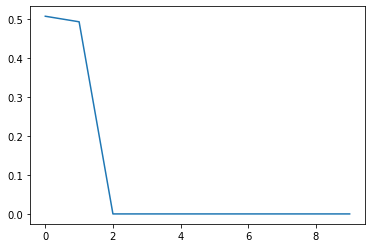

In [282]:

plt.plot(pca.explained_variance_ratio_)

### Splitting Data

In [196]:
from sklearn.model_selection import train_test_split

# sample from sample due to long run times on certain machine learning algorithms
# sample_size = 25_000
# X = X.sample(sample_size)

X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.2, stratify=y, random_state=10)

In [197]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep="\n")

(79309, 10)
(79309,)
(19828, 10)
(19828,)


### Models

In [153]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

def print_scores(y_test, y_pred, y_prob=[]):
  print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))
  print(classification_report(y_test, y_pred))

  if len(y_prob) > 0:
    print("ROC_AUC Score: {:.5f}".format(roc_auc_score(y_test, y_prob)))
  cf = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(12,8))
  sns.heatmap(cf, annot=True, ax=ax)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("True")


#### Logistic Regression

In [283]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Evaluation

In [284]:
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)

Accuracy: 0.98623
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19555
         1.0       0.00      0.00      0.00       273

    accuracy                           0.99     19828
   macro avg       0.49      0.50      0.50     19828
weighted avg       0.97      0.99      0.98     19828

ROC_AUC Score: 0.61187


/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

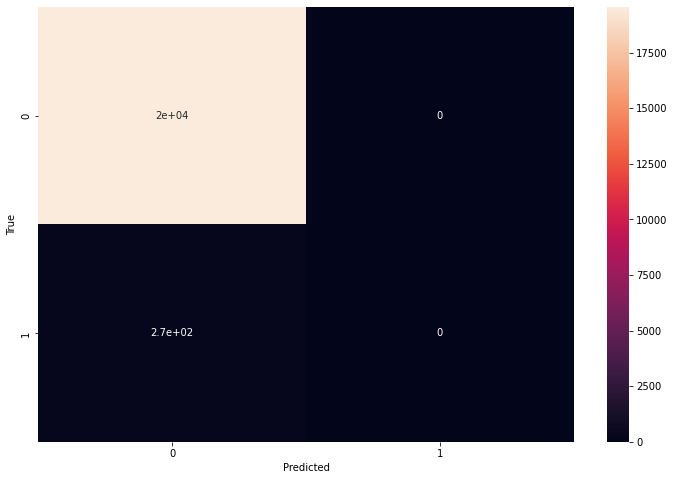

In [285]:
print_scores(y_test, y_pred, y_prob[:, 1])

#### RandomForestClassifier

In [286]:
from sklearn.ensemble import  RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=30, random_state=10)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=10)

In [287]:
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)

Accuracy: 0.98527
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19555
         1.0       0.00      0.00      0.00       273

    accuracy                           0.99     19828
   macro avg       0.49      0.50      0.50     19828
weighted avg       0.97      0.99      0.98     19828

ROC_AUC Score: 0.67578


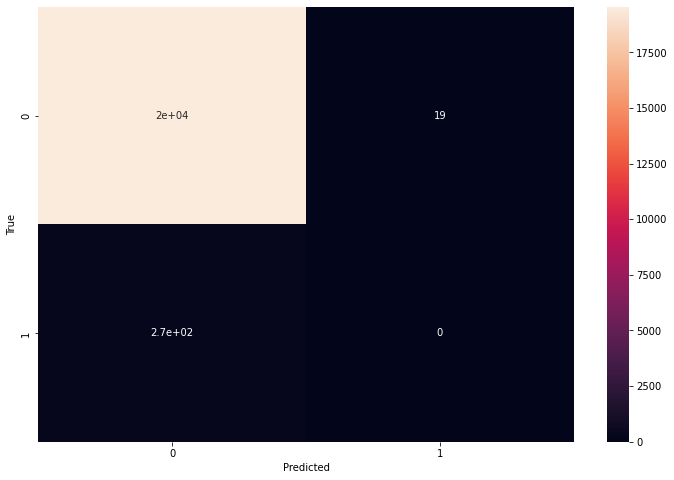

In [288]:
print_scores(y_test, y_pred, y_prob[:, 1])

#### Naive Bayes

In [289]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [290]:
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)

Accuracy: 0.98623
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19555
         1.0       0.00      0.00      0.00       273

    accuracy                           0.99     19828
   macro avg       0.49      0.50      0.50     19828
weighted avg       0.97      0.99      0.98     19828

ROC_AUC Score: 0.67334


/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

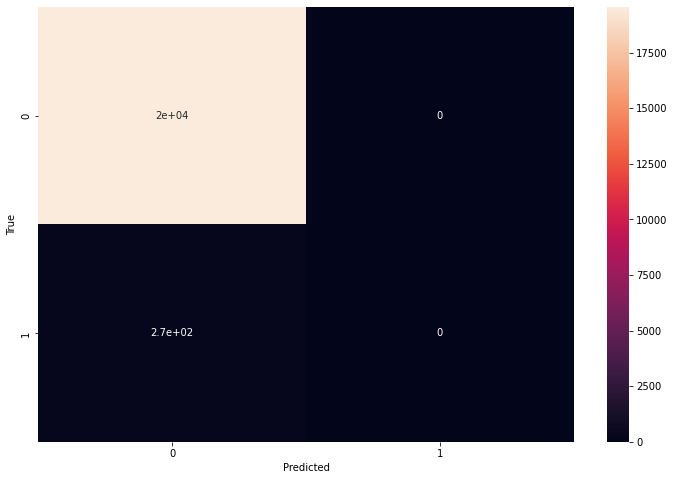

In [291]:
print_scores(y_test, y_pred, y_prob[:, 1])

#### SVM

In [292]:
from sklearn.linear_model import SGDClassifier

svc = SGDClassifier(n_jobs=-1, loss="log_loss")

svc.fit(X_train, y_train)

SGDClassifier(loss='log_loss', n_jobs=-1)

In [293]:
y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)

Accuracy: 0.98623
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19555
         1.0       0.00      0.00      0.00       273

    accuracy                           0.99     19828
   macro avg       0.49      0.50      0.50     19828
weighted avg       0.97      0.99      0.98     19828

ROC_AUC Score: 0.50000


/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gianluca/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

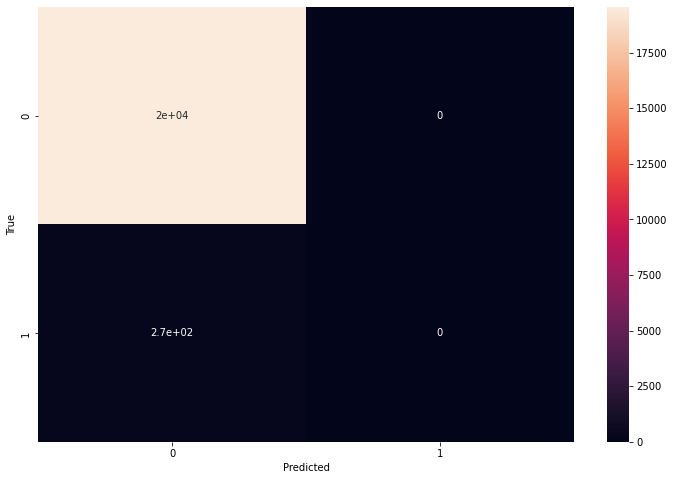

In [294]:
print_scores(y_test, y_pred, y_prob[:,1])